## `Outlier (Percentile Method)`

- Here we only need to define the threshold through the percentiles.
- Whenever we do `capping` using the `Percentile method` it is known as **`Winsorization`**
- In this method the `percentile` to be used as *`outliers`* on both ends should remain same. That is if the upper limit is `99%` then the lower limit should be `1%` out of `100%` data distribution.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset

df = pd.read_csv('datasets/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

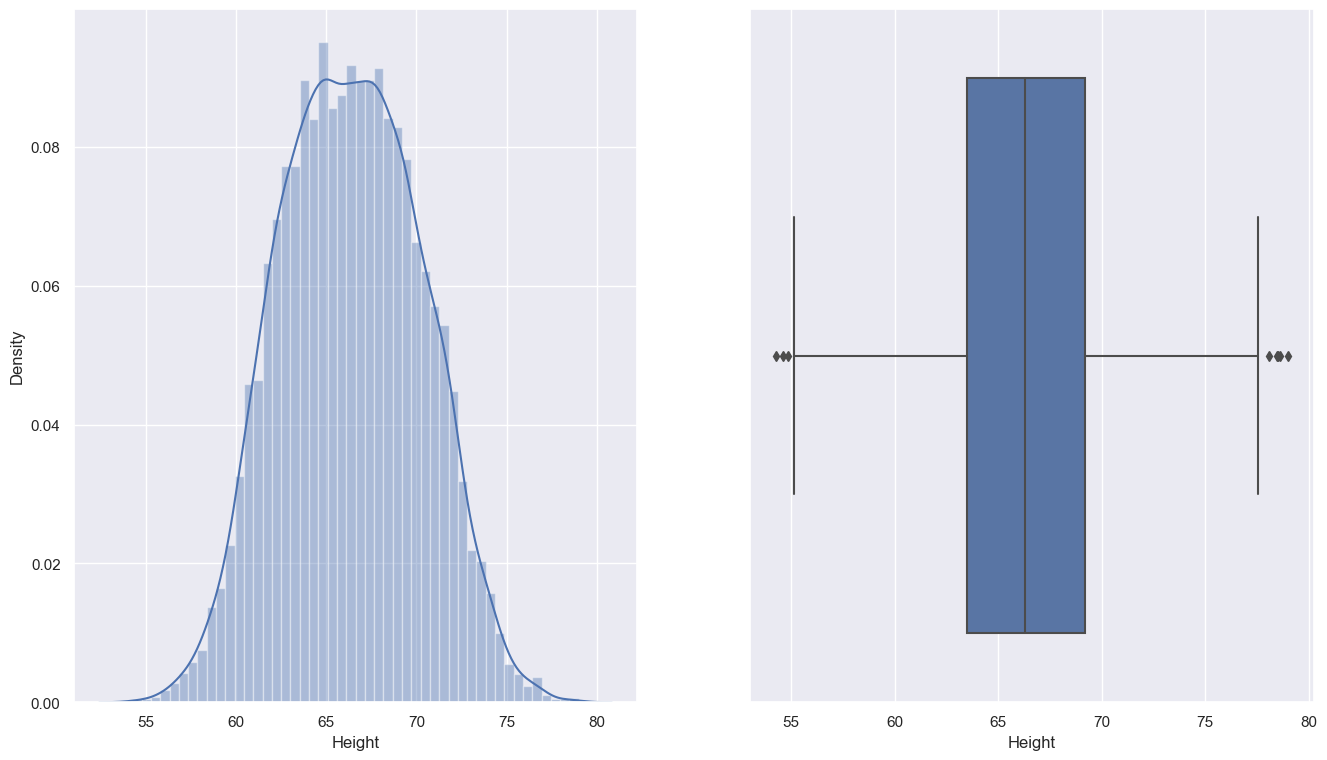

In [5]:
plt.figure(figsize=(16, 9))
plt.subplot(1,2,1)
sns.distplot(df['Height'])

plt.subplot(1,2,2)
sns.boxplot(df['Height'])

plt.show()

**Trimming**

In [6]:
# here we are using 99% as upper limit and 1% as lower limit
# That is any number over or lower than 99 percentile or 1 percentile is an outlier

upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

print("Upper limit is: ", upper_limit)
print("Lower limit is: ", lower_limit)

Upper limit is:  74.7857900583366
Lower limit is:  58.13441158671655


In [14]:
# Creating new dataset after removing the outliers

new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [15]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

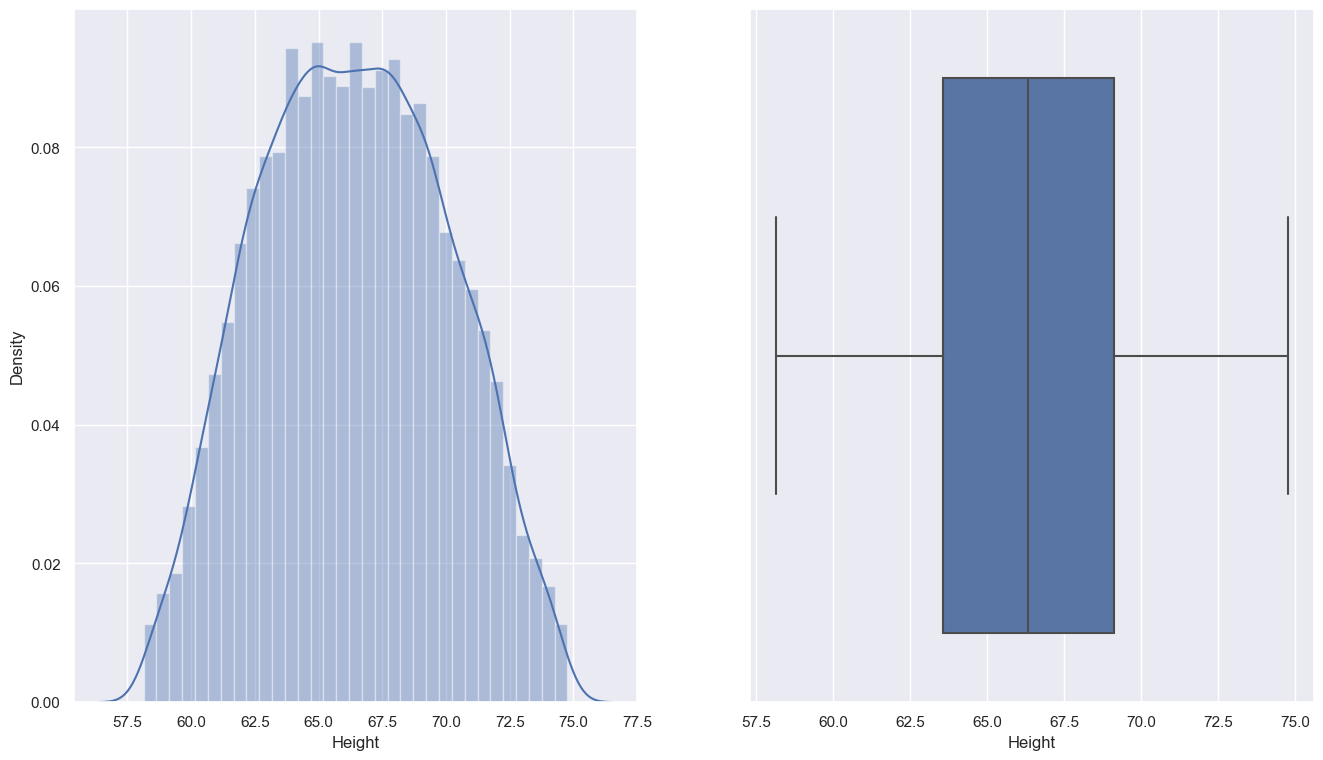

In [9]:
plt.figure(figsize=(16, 9))
plt.subplot(1,2,1)
sns.distplot(new_df['Height'])

plt.subplot(1,2,2)
sns.boxplot(new_df['Height'])

plt.show()

**Capping / Winsorization**

In [10]:
capped_df = df.copy()

capped_df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

capped_df.shape

(10000, 3)

In [13]:
capped_df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

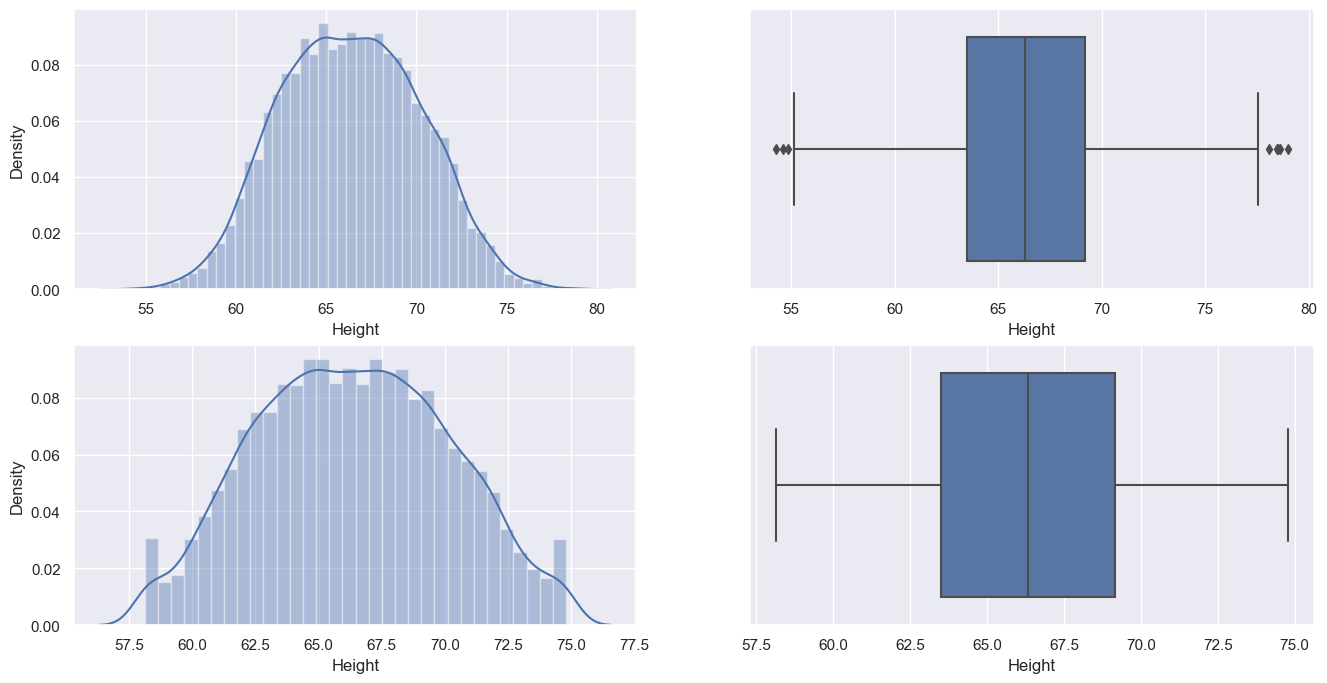

In [12]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.subplot(2,2,3)
sns.distplot(capped_df['Height'])

plt.subplot(2,2,4)
sns.boxplot(capped_df['Height'])

plt.show()